In [8]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = pd.read_csv('knetwork2.csv')

In [5]:
data

,Unnamed: 0,Year,Country 1,Country 2,No. of Collaborations,No. of Publications of Country 1,No. of Publications of Country 2,Collaborators,Total No. of Publications,Continent of Country 1,Continent of Country 2,Percent of Total Publications of Country 1,Percent of Total Publications of Country 2,Rank of Country 1,Rank of Country 2
0,0,2000,USA,Mexico,5.0,286.0,8.0,USA & Mexico,1391.0,North America,North America,20.560748,0.575126,1/133,25/133
1,1,2000,USA,Canada,5.0,286.0,33.0,USA & Canada,1391.0,North America,North America,20.560748,2.372394,1/133,10/133
2,16,2000,USA,Venezuela,1.0,286.0,1.0,USA & Venezuela,1391.0,North America,South America,20.560748,0.071891,1/133,57/133
3,33,2000,USA,Egypt,1.0,286.0,8.0,USA & Egypt,1391.0,North America,Africa,20.560748,0.575126,1/133,26/133
4,48,2000,USA,China,3.0,286.0,27.0,USA & China,1391.0,North America,Asia,20.560748,1.941050,1/133,12/133
5,53,2000,USA,Russia,14.0,286.0,110.0,USA & Russia,1391.0,North America,Asia,20.560748,7.907980,1/133,4/133
6,54,2000,USA,Japan,20.0,286.0,205.0,USA & Japan,1391.0,North America,Asia,20.560748,14.737599,1/133,2/133
7,61,2000,USA,Korea,1.0,286.0,47.0,USA & Korea,1391.0,North America,Asia,20.560748,3.378864,1/133,7/133
8,63,2000,USA,Arabia,1.0,286.0,2.0,USA & Arabia,1391.0,North America,Asia,20.560748,0.143781,1/133,43/133
9,75,2000,USA,Israel,3.0,286.0,15.0,USA & Israel,1391.0,North America,Asia,20.560748,1.078361,1/133,17/133


In [7]:
data['No. of Publications of Country 1'] - data['No. of Publications of Country 2']

0       278.0
1       253.0
2       285.0
3       278.0
4       259.0
5       176.0
6        81.0
7       239.0
8       284.0
9       271.0
10      123.0
11      184.0
12      239.0
13      276.0
14      275.0
15      270.0
16      252.0
17      274.0
18      267.0
19      281.0
20      281.0
21      285.0
22      285.0
23      274.0
24     -102.0
25      -14.0
26       32.0
27       32.0
28     -130.0
29       22.0
        ...  
5357      5.0
5358     -8.0
5359     23.0
5360     27.0
5361     21.0
5362     30.0
5363    -13.0
5364     25.0
5365     28.0
5366     16.0
5367     25.0
5368     28.0
5369      8.0
5370     38.0
5371     37.0
5372     38.0
5373     41.0
5374     38.0
5375     21.0
5376      9.0
5377      4.0
5378      0.0
5379      5.0
5380     15.0
5381      5.0
5382    -12.0
5383     -3.0
5384    -20.0
5385     -6.0
5386    -17.0
dtype: float64

In [39]:
"""Here, I try to make a histogram and normal distribution of the difference between countries in number of publications"""

'Here, I try to make a histogram and normal distribution of the difference between countries in number of publications'

In [9]:
pub_diff = data['No. of Publications of Country 1'] - data['No. of Publications of Country 2']

In [34]:
abs_pub_diff = abs(pub_diff)

In [35]:
mu = np.mean(abs_pub_diff)

In [36]:
mu

90.04418043437906

In [37]:
np.std(abs_pub_diff)

95.31926897474308

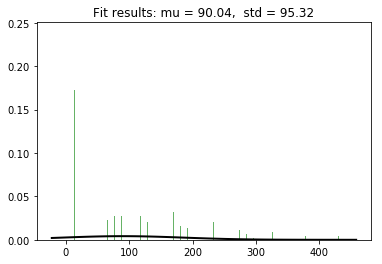

In [38]:
from scipy.stats import norm

# Fit a normal distribution to the data:
mu, std = norm.fit(abs_pub_diff)

# Plot the histogram.
plt.hist(abs_pub_diff, bins=len(abs_pub_diff), normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [40]:
"""Next, I'm going to filter out all of the countries that are above the mean difference."""

"Next, I'm going to filter out all of the countries that are above the mean difference."

In [94]:
x = (np.where(abs_pub_diff < mu))
x = np.reshape(x,np.size(x))
y = x.tolist()

In [95]:
data['Collaborators'][y]

6                    USA & Japan
25                Canada & Korea
26             Canada & Malaysia
27               Canada & Kuwait
29              Canada & Romania
30               Canada & Sweden
31          Canada & Switzerland
32               Canada & Monaco
33                 Brazil & Peru
36               Brazil & France
37                Brazil & Italy
38          Brazil & Netherlands
39                Brazil & Czech
40              Brazil & Hungary
43             Venezuela & Italy
44           Venezuela & Romania
46                Sudan & Sweden
48                China & Russia
50                 China & Italy
51               China & Belgium
52               China & Hungary
53           China & Switzerland
56                Russia & Korea
57              Russia & Germany
58               Russia & France
59                Russia & Italy
60                Russia & Spain
63              Russia & Belgium
66               Russia & Sweden
72               Japan & Germany
          

In [56]:
x

(array([   6,   25,   26, ..., 5384, 5385, 5386]),)